In [28]:
from fastbook import *
import ipywidgets as widgets
from IPython.display import display

In [3]:
urls = search_images_ddg('labrador retriever', max_images=1)
len(urls),urls[0]

(1, 'http://cdn.akc.org/Marketplace/Breeds/Labrador_Retriever_SERP.jpg')

In [4]:
dest = Path('labrador.jpg')
if not dest.exists() : download_url(urls[0],dest)

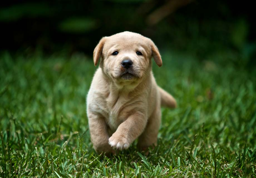

In [12]:
im = Image.open(dest)
im.to_thumb(256,256)

In [14]:
searches = 'cat','labradoodle' , 'german sphepherd' , 'labrador retriever' , 'golden retriever'
path = Path('labrador_or_not')
if not path.exists():
    path.mkdir(exist_ok=False)
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} photo',max_images=200)
        download_images(dest,urls=results[:200])
        resize_images(dest,max_size=400,dest=dest)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

22

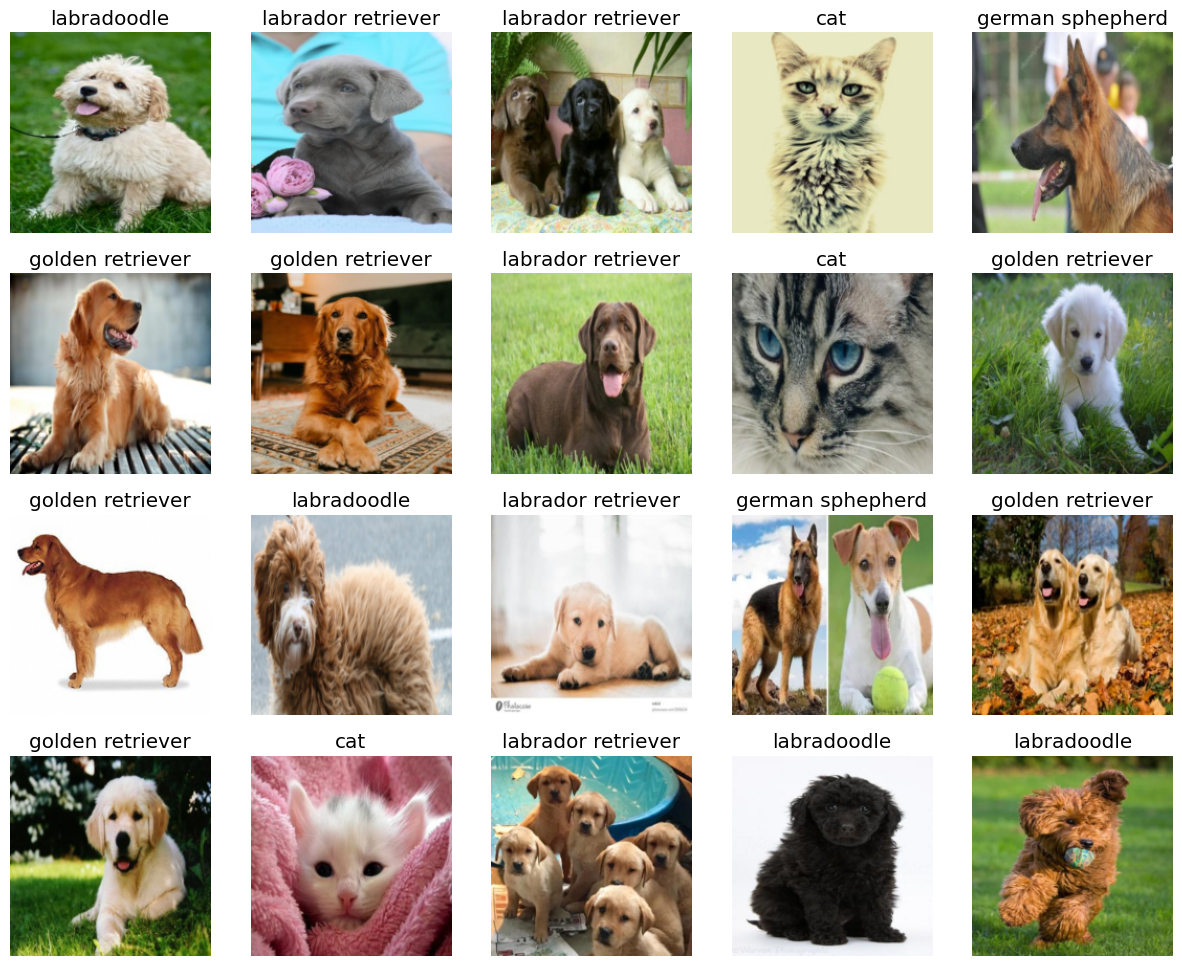

In [17]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192,method='squish')]
).dataloaders(path)
dls.show_batch(max_n=20)

In [ ]:
learn = vision_learner(dls,resnet50,metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/lalitmanchanda/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:03<00:00, 33.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.130777,0.081048,0.015957,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.125546,0.062425,0.010638,00:53
1,0.100222,0.094596,0.031915,00:51
2,0.072168,0.074823,0.026596,00:51
3,0.057876,0.079453,0.021277,00:50
4,0.043532,0.076626,0.015957,00:51


In [34]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value=(), description='Upload')

In [85]:
print(uploader.value)
uploaded_file = uploader.value[0]
#uploaded_file["size"]
#=> 36
uploaded_file.size
#=> 36
widgets.Image(value = uploaded_file.content.tobytes(),width=192,height=192)
#im.to_thumb(192,192)

({'name': 'man1.jpeg', 'type': 'image/jpeg', 'size': 4203, 'content': <memory at 0x155f8d540>, 'last_modified': datetime.datetime(2024, 4, 13, 16, 27, 36, 270000, tzinfo=datetime.timezone.utc)},)


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x…

In [86]:
is_lab,_,prob = learn.predict(PILImage.create('/Users/lalitmanchanda/downloads/'+uploaded_file.name))
print(f'This is a :{is_lab}')
print(f'Probability its a lab: {prob}')
#When I try running the prediction with image which is entierly different from the trained set (like of a man), the classification comes out 
# to be labrador retriever with .999 probability

This is a :labrador retriever
Probability its a lab: tensor([3.7224e-05, 1.6353e-04, 1.1937e-04, 1.6675e-04, 9.9951e-01])
